# Google Play Store Apps

'Explainging the dataset'

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Initial Exploration

In [109]:
dataset_apps_path = r'googleplaystore_dataset\googleplaystore.csv'
dataset_apps = pd.read_csv(dataset_apps_path)

In [110]:
dataset_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [111]:
dataset_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Cleaning

In [112]:
dataset_apps_clean = dataset_apps.dropna(subset=['Rating', 'Installs', 'Reviews'])

In [113]:
dataset_apps_clean = dataset_apps_clean.drop_duplicates()

In [114]:
dataset_apps_clean['Category'] = dataset_apps_clean['Category'].astype('category')
dataset_apps_clean['Reviews'] = pd.to_numeric(dataset_apps_clean['Reviews'], errors='coerce')

dataset_apps_clean['Installs'] = dataset_apps_clean['Installs'].str.replace('+', '').str.replace(',', '')
dataset_apps_clean['Installs'] = pd.to_numeric(dataset_apps_clean['Installs'], errors='coerce')

In [115]:
summary = f'''Apps
Before cleaning {dataset_apps.shape} => After cleaning {dataset_apps_clean.shape}'''
print(summary)

Apps
Before cleaning (10841, 13) => After cleaning (8893, 13)


## Exploratory Data Analysis

### Univariate (App Categories)

F:\Users\rakan\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


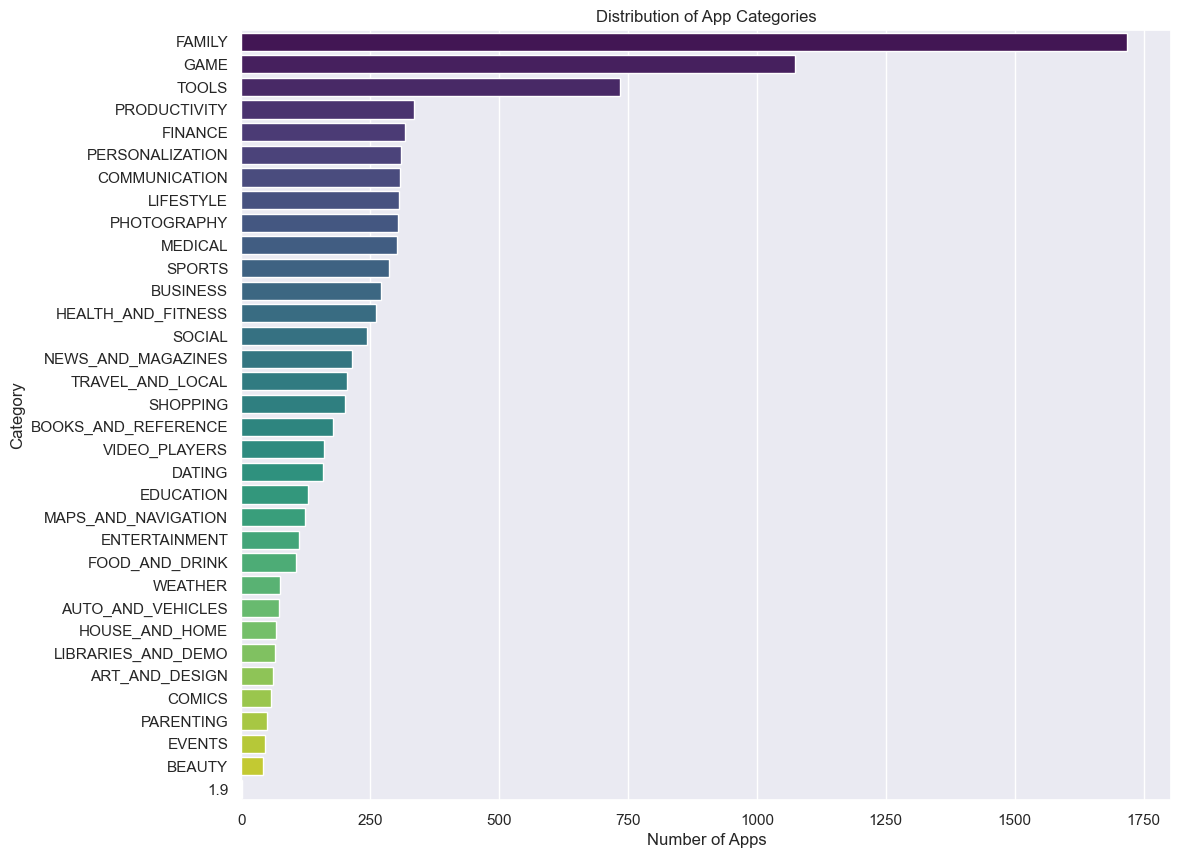

In [116]:
sns.set(style="darkgrid")

plt.figure(figsize=(12, 10))
sns.countplot(y='Category', data=dataset_apps_clean, order=dataset_apps_clean['Category'].value_counts().index, palette="viridis")
plt.title('Distribution of App Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()


### Bivariate (Rating Based on Number of Reviews)

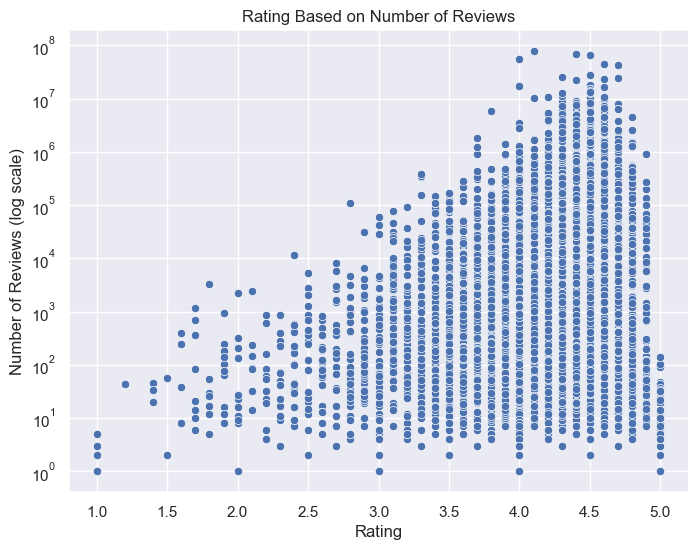

In [117]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Reviews', data=dataset_apps_clean)
plt.title('Rating Based on Number of Reviews')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews (log scale)')
plt.yscale('log')
plt.show()

### Summary Statistics 

In [118]:
dataset_apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Feature Engineering

In [119]:
dataset_apps_clean['Engagement Score'] = dataset_apps_clean['Reviews'] / dataset_apps_clean['Installs']

In [120]:
dataset_apps_clean[['App', 'Reviews', 'Installs', 'Engagement Score']].head()

,App,Reviews,Installs,Engagement Score
0,Photo Editor & Candy Camera & Grid & ScrapBook,159.0,10000.0,0.015900
1,Coloring book moana,967.0,500000.0,0.001934
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510.0,5000000.0,0.017502
3,Sketch - Draw & Paint,215644.0,50000000.0,0.004313
4,Pixel Draw - Number Art Coloring Book,967.0,100000.0,0.009670


## Conclusion

We've learned a few things from this exploratory data study, including

- App Categories: The app categories with the most apps are Family and Games, showing that many apps are made for fun and family activities
- Feature Engineering: We created an Engagement Score to measure user interact
- Rating based on number of reviews: we found that apps with more reviews often have higher ratings. This suggests good apps get more comments and are liked more